# Deep Neural Network for Image Classification using Convolution Neural Network.

In [1]:
#Author: Deepak Kumar Singh
#Date: 31/Aug/2020
#Classification Problem - CNN

In [2]:
# Import Library and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
Y_train.shape

(50000, 1)

In [7]:
Y_test.shape

(10000, 1)

[0]


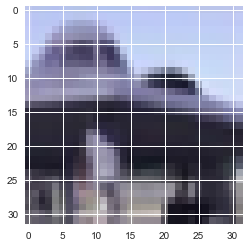

In [8]:
# Data Visualization
#Checking a random image from dataset

%matplotlib inline

i = 31201
plt.imshow(X_train[i])
print(Y_train[i])

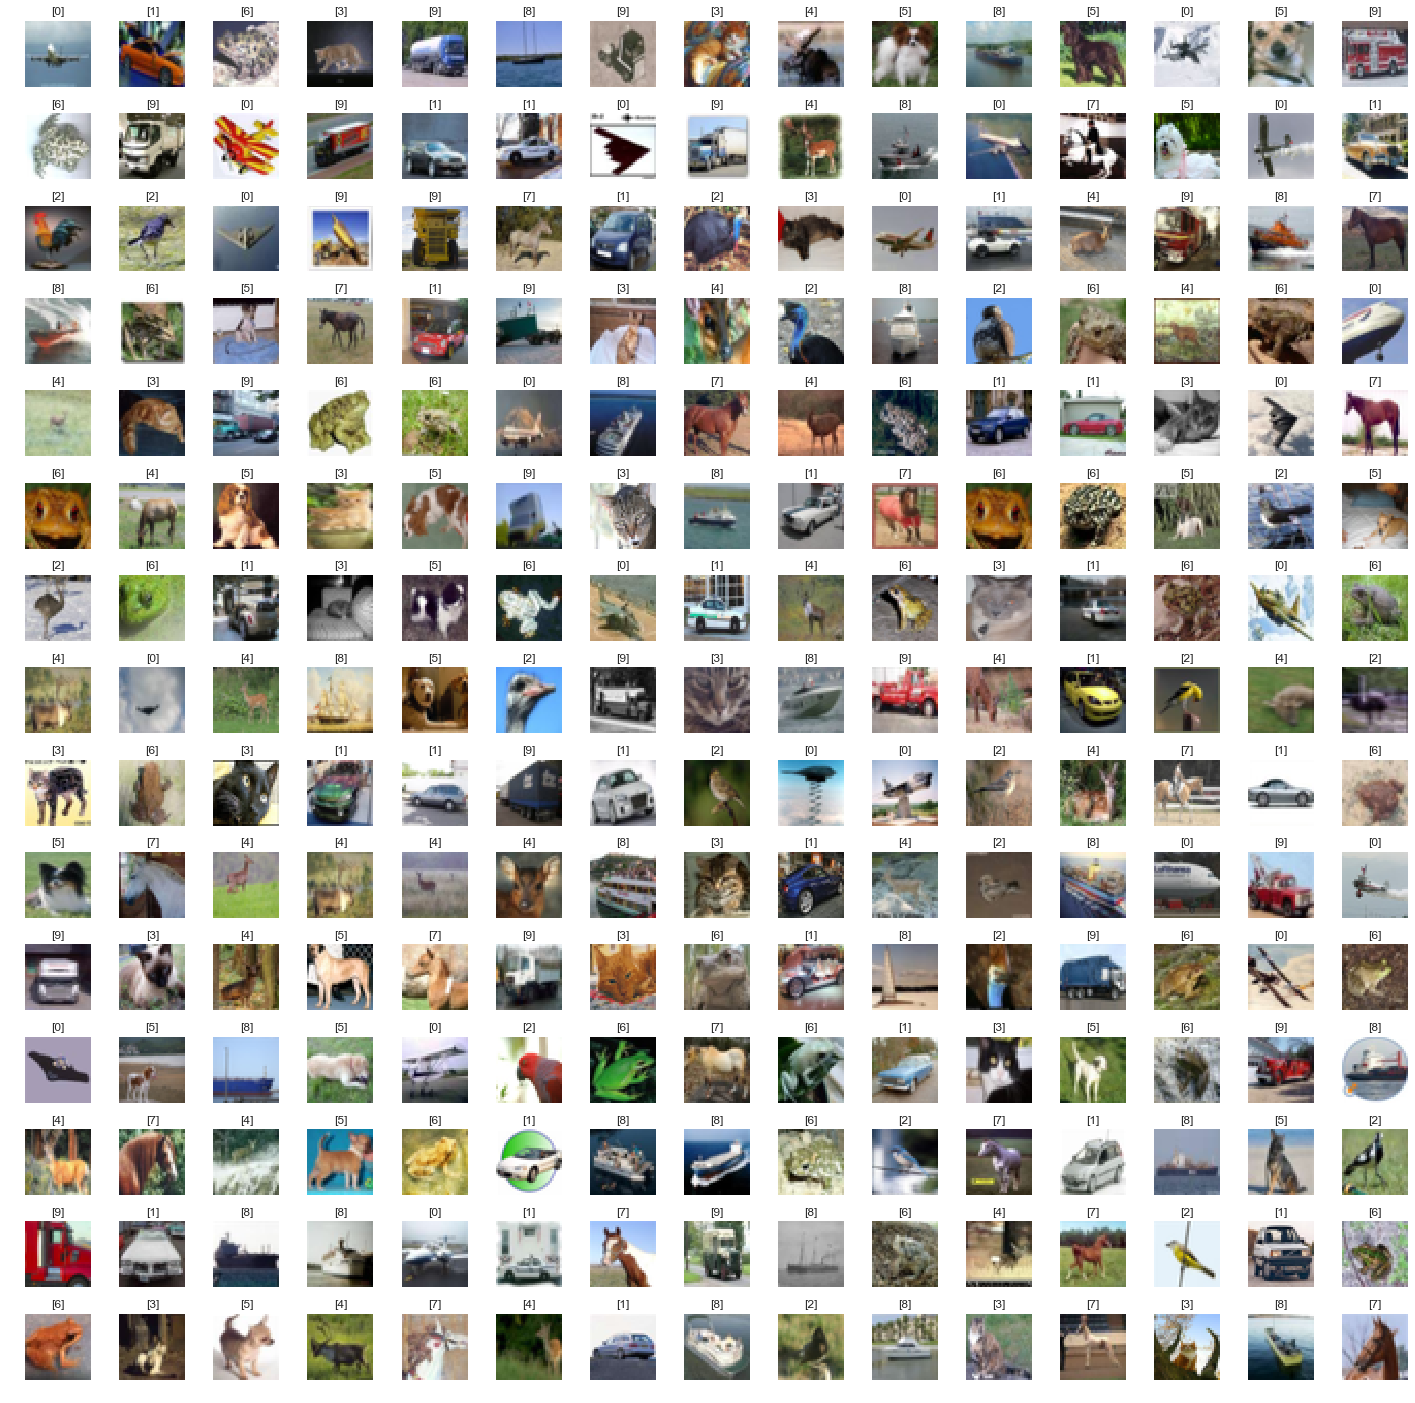

In [9]:
#print a matrix of images

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel() #ravel used to flatten the matrix into arrays

n_training = len(X_train)

#Using For loop to plot images in the above grid

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) #picks a random image from training set
    axes[i].imshow(X_train[index]) #plot the image for that random index
    axes[i].set_title(Y_train[index])
    axes[i].axis('off') # Get rid of the axes
    
plt.subplots_adjust(hspace = 0.4)    



In [10]:
# Data Preparation

X_train = X_train.astype('float32') #Converting the actual images to float type
X_test = X_test.astype('float32')

In [11]:
num_categories = 10

In [12]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
Y_train = keras.utils.to_categorical(Y_train, num_categories) #Converting to categories

In [14]:
Y_train #Now in Binary format

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
Y_test = keras.utils.to_categorical(Y_test, num_categories)
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
#Data Normalization

X_train = X_train/255
X_test = X_test/255

In [17]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
Input_Shape = X_train.shape[1:]

In [19]:
Input_Shape

(32, 32, 3)

In [20]:
# Training the CNN model using Keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard




In [21]:
#Building the network in Sequential manner
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_Shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu')) #Another layer of Convolution
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3)) #Dropout 30% of the neurons along with their weights for Regularization


#Build additional layer of Convolution, to increase the Depth
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')) 
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2)) 

cnn_model.add(Flatten()) #Flattening

cnn_model.add(Dense(units = 512, activation = 'relu')) #Using Dense to make fully connected neurons
cnn_model.add(Dense(units = 512, activation = 'relu')) #Another Hidden layer

cnn_model.add(Dense(units = 10, activation = 'softmax')) #Output layer



In [22]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [23]:
#History captures all the progression of the network, how the network is trained
#Epoch - one Epoch is when the entire dataset is passed forward and backward through the neursl network only once.
#Try running the model with different number of epochs.

history = cnn_model.fit(X_train, Y_train, batch_size = 32, epochs = 2, shuffle = True)




Epoch 1/2
1563/1563 [==============================] - 208s 133ms/step - loss: 1.5520 - accuracy: 0.4396

In [24]:
#Evaluate the model
cnn_model.evaluate(X_test, Y_test)
#print('Test Accuracy is {}'.format(evaluation[1]))
      

313/313 [==============================] - 10s 32ms/step - loss: 1.2053 - accuracy: 0.5942

[1.2053403854370117, 0.5942000150680542]

In [25]:
#Prediction

predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 1, 8, ..., 5, 4, 7])

In [26]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [27]:
Y_test = Y_test.argmax(1) #Convert Binary to decimal values

In [28]:
Y_test

array([3, 8, 8, ..., 5, 1, 7])

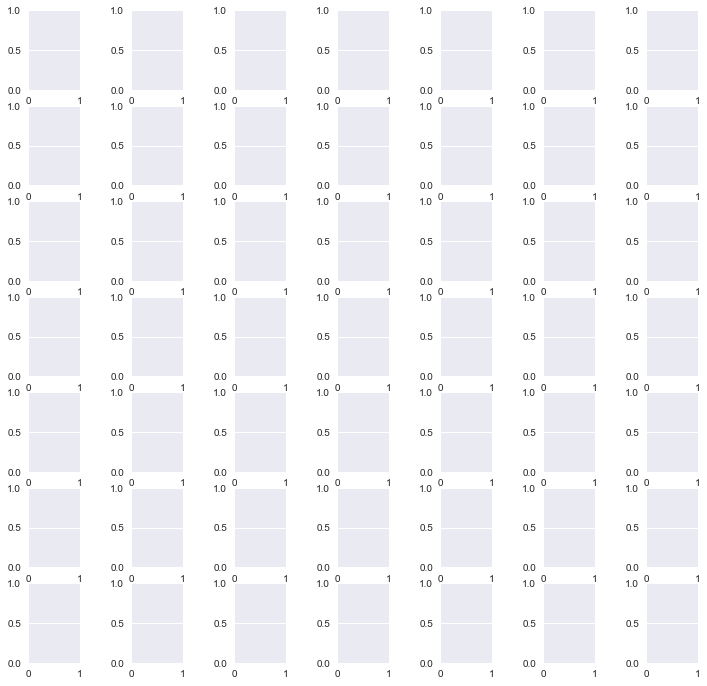

In [29]:
#Some Issue with the code here
L = 7
W = 7
fig,size = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], Y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)    
    


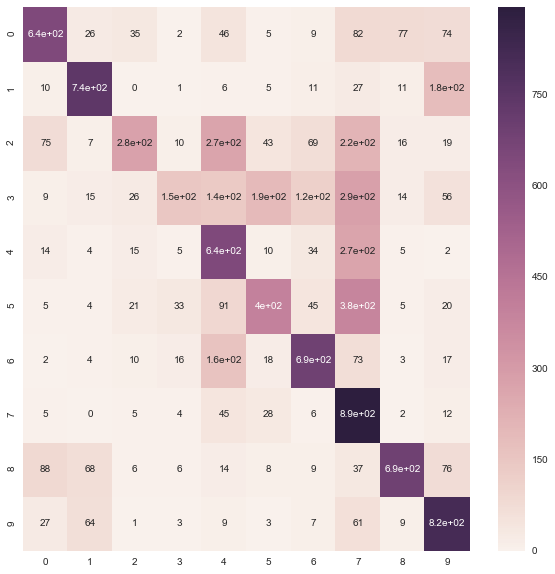

In [30]:
#Confusion matrix - to summarize results in one location

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, predicted_classes)
cm

plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True) #values in the diagnoal means model is okay. Other higher values indicates model has messed up

In [31]:
#Saving the model

import os
dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(dir):
    os.makedirs(dir)
    
model_path = os.path.join(dir, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

#Data/Image Augmentation
#Example - change lighting of the image, change brighness of image, rotate 90, rotate 180 etc, Different variation of image
# Helps to perform better generalization, dataset is extended to see more variations for better training

import keras
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train.shape


n = 8
X_train_sample = X_train[:n]

X_train_sample.shape

#Augmentation (Need to read more on this)

from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90) #Specify what to do with images, use Shift+Tab to see options

#dataget_train = ImageDataGenerator(Vertical_flip = True) 
#dataget_train = ImageDataGenerator(height_shift_range = 0.5) 
#dataget_train = ImageDataGenerator(brighness_range =(1,3))

dataget_train.fit(X_train_sample)


#from scipy.misc import toimage  #deprecated in later version of scipy
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Some issue with the code below

fig = plt.figure(figsize  = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(Image.fromarray(np.array(x_batch[i]))
    #plt.show()
    break;

In [32]:
#Model training using Augmented dataset

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                            )

In [33]:
datagen.fit(X_train)

In [34]:
cnn_model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 32), epochs = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
1563/1563 [==============================] - 230s 147ms/step - loss: 1.6908 - accuracy: 0.3921

In [36]:
#score = cnn_model.evaluate(X_test_, Y_test)
#print("Test Accuracy", score[1])

In [37]:
#Saving the new model which has trained on Augmented dataset

import os
dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(dir):
    os.makedirs(dir)
    
model_path = os.path.join(dir, 'keras_cifar10_trained_model_augmented.h5')
cnn_model.save(model_path)

In [ ]:
# ***** Needs revision, take some time to go through each of the topic in details.